In [1]:
import pandas as pd  # We require pandas to import the data from the csv files.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np    # We require numpy for the implementation of k-means.
import matplotlib.pyplot as plt# We require pyplot to visualise the data.
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the data -> cluster.csv
df=pd.read_csv('cluster.csv', header=None,names=['col1','col2','col3']) #reading csv file and storing in dataframe
#print(df)

In [2]:
df.head()

,col1,col2,col3
0,-0.062737,1.15060,-0.263880
1,0.009840,1.10940,0.026539
2,0.634140,1.19860,0.130720
3,-0.025846,1.00950,0.065832
4,-0.076149,-0.10025,0.154570


In [3]:
df.describe()

,col1,col2,col3
count,300.000000,300.000000,300.000000
mean,0.373272,0.510916,0.077496
std,0.428746,0.467564,0.219865
min,-0.232700,-0.279110,-0.285590
25%,0.006427,0.054281,-0.052774
50%,0.226855,0.504955,0.016611
75%,0.783833,0.979783,0.130818
max,1.230600,1.292300,0.717910


### Using Elbow Method because using this method we may get the exact number of clusters. This would be evaluted using the sharp curve generated using this method.

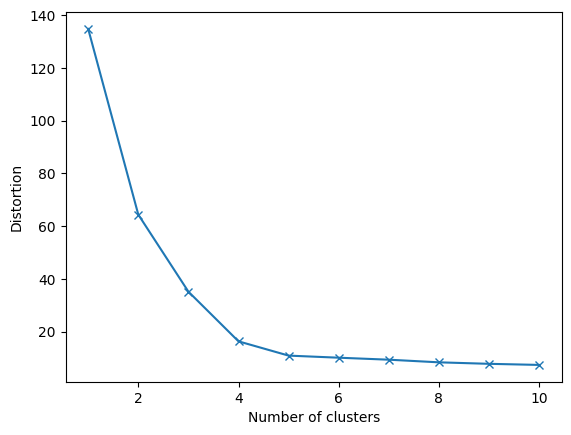

In [4]:
X=df.iloc[: ,].values
#print(X)
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=800,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

#print(distortions)
# plot
plt.plot(range(1, 11), distortions, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### As observed in the above graph, it does not have a sharp elbow. But we can observe there is a constant flow after obtaining value 5.
### we will be using Silhouette method to determine the number of clusters and verify it.

In [5]:
#Using Silhouette Method because its an alt method to generate the value for clusters .

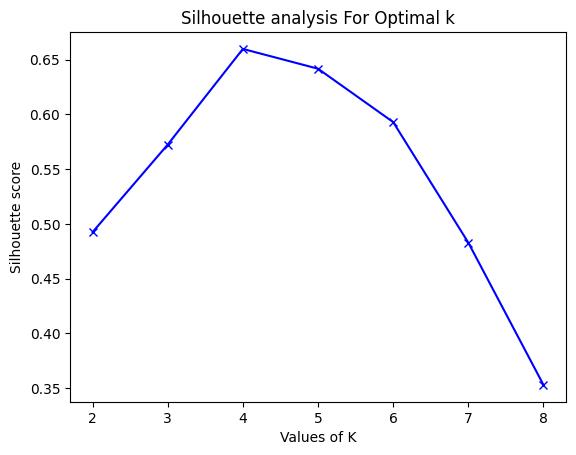

In [6]:
sil_avg = []
range_n_clusters = [ 2, 3, 4, 5, 6, 7, 8]
#print(X)
for k in range_n_clusters:
 #print(k)
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil_avg.append(silhouette_score(X, labels, metric = 'euclidean'))
plt.plot(range_n_clusters,sil_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

### Using the above Silhouette analysis, we can choose K’s optimal value as 4, because the average silhouette score is higher and indicates that the data points are optimally positioned. 

### Here, we can say that no of clusters formed will be 4 for the given dataset.

### From the observation of Elbow method and Silhouette analysis, elbow method has higher no of cluster compared to other.

### Step #3: Applying K-Means algorithm

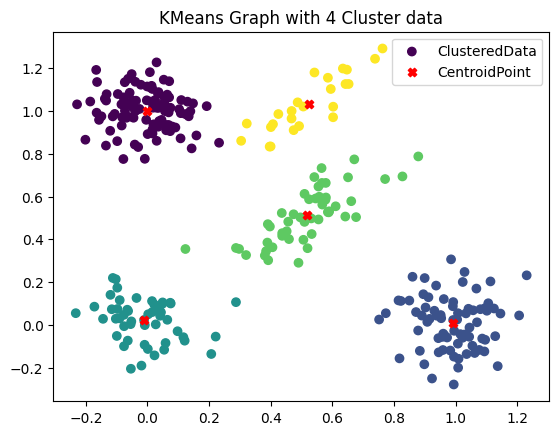

In [7]:
#df.drop(columns=["kmeans_cluster"], inplace=True)
kmeans=KMeans(n_clusters=5)
dfvalues=df.values
#print(dfvalues[:,2])
pred=kmeans.fit_predict(dfvalues)
#plt.scatter(df.iloc[:,0],df.iloc[:,1],c=pred,label="ClusteredData")
plt.scatter(dfvalues[:,0],dfvalues[:,1],c=pred,label="ClusteredData")
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',marker="X",label="CentroidPoint")
plt.title("KMeans Graph with 5 Cluster data")
plt.legend()
plt.show()

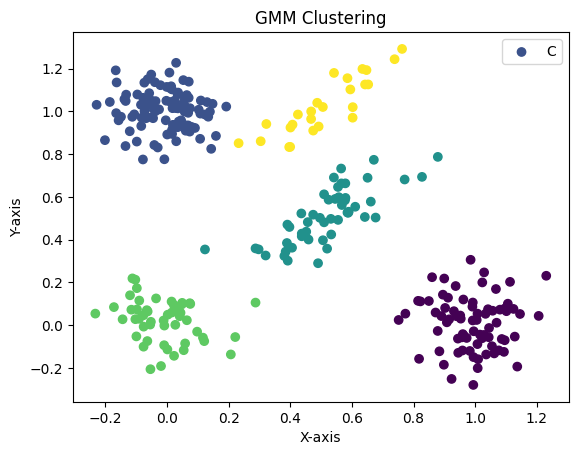

In [8]:

# Define the GMM model
gmm = GaussianMixture(n_components=5)

# Fit the GMM to the data
gmm.fit(X)

# predict the labels
labels = gmm.predict(X)
#print(labels)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("GMM Clustering")
plt.legend("Clusters")
plt.show()

# `Result`: '5' cluster is best result for this dataset based on Kmeans and GMM